We will be using Logistic regression, Decision tree, SVM, K-Nearest Neighbors algorithm to train and predict the data and using ROC corve and test error rate to test which model perform the best.  

Import the library

In [2]:
%pip install kagglehub
%pip install os
%pip install opendatasets
%pip install pandas==2.2.3
%pip install numpy==2.2.0
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn==1.5.2
%pip install xgboost==1.6.0
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached numpy-2.2.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import torch 

print(torch.cuda.is_available())
torch.zeros(1).cuda()

In [45]:
# import datetime
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN

Data definition :
1. index - Unique Identifier for each row
2. trans_date_trans_time - Transaction DateTime
3. cc_num - Credit Card Number of Customer
4. merchant - Merchant Name
5. category - Category of Merchant
6. amt - Amount of Transaction
7. first - First Name of Credit Card Holder
8. last - Last Name of Credit Card Holder
9. gender - Gender of Credit Card Holder
10. street - Street Address of Credit Card Holder
11. city - City of Credit Card Holder
12. state - State of Credit Card Holder
13. zip - Zip of Credit Card Holder
14. lat - Latitude Location of Credit Card Holder
15. long - Longitude Location of Credit Card Holder
16. city_pop - Credit Card Holder's City Population
17. job - Job of Credit Card Holder
18. dob - Date of Birth of Credit Card Holder
19. trans_num - Transaction Number
20. unix_time - UNIX Time of transaction
21. merch_lat - Latitude Location of Merchant
22. merch_long - Longitude Location of Merchant
23. is_fraud - Fraud Flag <--- Target Class


Import the data

In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1


In [47]:
# Import the data set from path
datas = os.listdir(path)
# Import the mitbih_train and mitbih_test dataset
train_df = pd.read_csv(os.path.join(path, 'fraudTrain.csv'))
test_df = pd.read_csv(os.path.join(path, 'fraudTest.csv'))

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Remove some of the coulumns that we don't need. including Unnamed:0, cc_num, category, first, last, street, zip, dob, lat, trans_num. 

In [49]:
train_df.drop(["trans_date_trans_time", "Unnamed: 0", "cc_num", "dob", "lat", "trans_num"], axis = 1, inplace = True)
test_df.drop(["trans_date_trans_time", "Unnamed: 0", "cc_num", "dob", "lat", "trans_num"], axis = 1, inplace = True)

In [50]:
train_x = train_df.drop(columns = ["is_fraud"], axis = 1)
train_y = train_df["is_fraud"]

test_x = test_df.drop(columns = ["is_fraud"], axis = 1)
test_y = test_df["is_fraud"]

### pie chart

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x29e152d0cd0>,
 [Text(-1.0998181131964657, 0.02000294690705531, '1'),
  Text(1.0998181149229591, -0.020002851979370503, '0')],
 [Text(-0.5999007890162539, 0.010910698312939258, '99.4%'),
  Text(0.5999007899579777, -0.010910646534202092, '0.6%')])

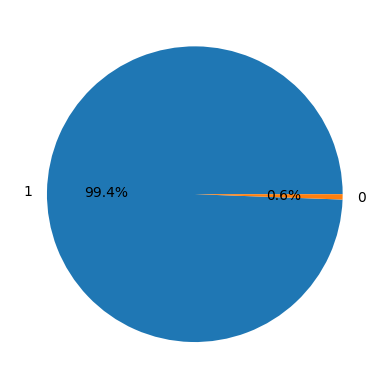

In [51]:
print(train_y.value_counts())

x = [1, 0]
plt.pie(train_y.value_counts(), labels = x, autopct = '%1.1f%%', )

is_fraud
0    553574
1      2145
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x29e254f9e90>,
 [Text(-1.0999191268840707, 0.013338452480854692, '1'),
  Text(1.0999191263279473, -0.01333849833996486, '0')],
 [Text(-0.5999558873913112, 0.007275519535011649, '99.6%'),
  Text(0.5999558870879712, -0.007275544549071741, '0.4%')])

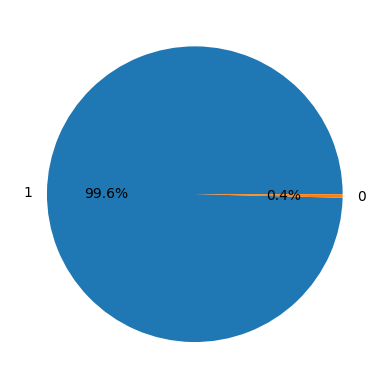

In [52]:
print(test_y.value_counts())

plt.pie(test_y.value_counts(), labels = x, autopct = '%1.1f%%', )

### Data preprocessing

In [53]:
train_x['merchant'] = train_x['merchant'].apply(lambda x : x.replace('fraud_',''))
test_x['merchant'] = test_x['merchant'].apply(lambda x : x.replace('fraud_',''))


train_x['cents'] = (train_x['amt'] - np.floor(train_x['amt'])).astype('float16')
test_x['cents'] = (test_x['amt'] - np.floor(test_x['amt'])).astype('float16')

In [54]:
cat_cols = []
num_cols = []

for col in train_x.columns:
    if train_x[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(cat_cols)
print(num_cols)

['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
['amt', 'zip', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'cents']


In [55]:
# Frequency encoding
for col in cat_cols:
    # Compute the value counts in the training set
    train_value_counts = train_x[col].value_counts()
    test_value_counts = test_x[col].value_counts()  # Use the same value counts for the test set

    # Map the frequencies back to the original column
    train_x[col] = train_x[col].map(train_value_counts)
    test_x[col] = test_x[col].map(test_value_counts)  # Use the same mapping for the test set


In [57]:
# redo standard scaling  except gender

sc = StandardScaler()

for col in train_x.columns:
    train_x[col] = sc.fit_transform(train_x[[col]])
    test_x[col] = sc.fit_transform(test_x[[col]])

In [59]:
le = LabelEncoder()
train_x['gender'] = le.fit_transform(train_x['gender'])
test_x['gender'] = le.fit_transform(test_x['gender'])

In [62]:
# Dtype 
for col in train_x.columns:
    if train_x[col].dtype == "int64":
        train_x[col] = train_x[col].astype('int16')
        test_x[col] = test_x[col].astype('int16')
    elif train_x[col].dtype == "float64":
        train_x[col] = train_x[col].astype('float16')
        test_x[col] = test_x[col].astype('float16')
# int64 to int16
# float 64 to float16

### Resample

In [63]:
from sklearn.utils import resample
new_train_df = pd.concat([train_x, train_y], axis = 1)
balanced_train = resample(new_train_df[new_train_df['is_fraud'] == 0], 
                          n_samples = len(new_train_df[new_train_df['is_fraud'] == 1]), 
                          random_state = 42)

Train_x = pd.concat([new_train_df[new_train_df['is_fraud'] == 1], balanced_train])
Train_y = Train_x['is_fraud']
Train_x = Train_x.drop(columns = ["is_fraud"], axis = 1)


<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 123118 to 1053807
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    7506 non-null   float16
 1   category    7506 non-null   float16
 2   amt         7506 non-null   float16
 3   first       7506 non-null   float16
 4   last        7506 non-null   float16
 5   gender      7506 non-null   int16  
 6   street      7506 non-null   float16
 7   city        7506 non-null   float16
 8   state       7506 non-null   float16
 9   zip         7506 non-null   float16
 10  long        7506 non-null   float16
 11  city_pop    7506 non-null   float16
 12  job         7506 non-null   float16
 13  unix_time   7506 non-null   float16
 14  merch_lat   7506 non-null   float16
 15  merch_long  7506 non-null   float16
 16  cents       7506 non-null   float16
 17  is_fraud    7506 non-null   int64  
dtypes: float16(16), int16(1), int64(1)
memory usage: 366.5 KB


In [64]:
new_test_df = pd.concat([test_x, test_y], axis = 1)
balanced_test = resample(new_test_df[new_test_df['is_fraud'] == 0], 
                          n_samples = len(new_test_df[new_test_df['is_fraud'] == 1]), 
                          random_state = 42)

test_x = pd.concat([new_test_df[new_test_df['is_fraud'] == 1], balanced_test])
test_y = test_x['is_fraud']
test_x = test_x.drop(columns = ["is_fraud"], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 122448 to 93655
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    2145 non-null   float16
 1   category    2145 non-null   float16
 2   amt         2145 non-null   float16
 3   first       2145 non-null   float16
 4   last        2145 non-null   float16
 5   gender      2145 non-null   int16  
 6   street      2145 non-null   float16
 7   city        2145 non-null   float16
 8   state       2145 non-null   float16
 9   zip         2145 non-null   float16
 10  long        2145 non-null   float16
 11  city_pop    2145 non-null   float16
 12  job         2145 non-null   float16
 13  unix_time   2145 non-null   float16
 14  merch_lat   2145 non-null   float16
 15  merch_long  2145 non-null   float16
 16  cents       2145 non-null   float16
 17  is_fraud    2145 non-null   int64  
dtypes: float16(16), int16(1), int64(1)
memory usage: 104.7 KB


Logistic Regression Model

In [66]:
# Build the Logistic Regression model
logreg = LogisticRegression()

# Fitting the data
logreg.fit(Train_x, Train_y)

# Predict the data
y_pred = logreg.predict(test_x)

Accuracy of logistic regression classifier on test set: 0.84476
Confusion matrix:
[[2022  123]
 [ 543 1602]]
ROC-AUC score:
0.8447552447552447


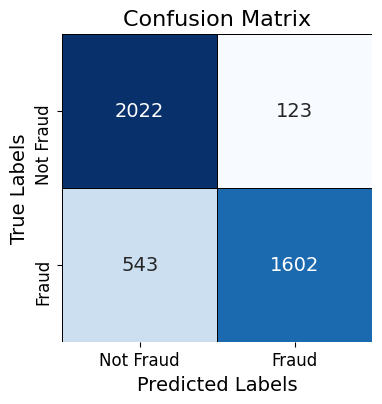

In [67]:
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc_log = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc_log)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n")
print(classification_report(test_y, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2145
           1       0.93      0.75      0.83      2145

    accuracy                           0.84      4290
   macro avg       0.86      0.84      0.84      4290
weighted avg       0.86      0.84      0.84      4290



SVM (Support Vector Machine) model

In [69]:
# Support Vector Classification model
svm = SVC(kernel='rbf', gamma = 0.0001, C = 100)

# Fit the data 
svm.fit(Train_x, Train_y)

# Predict
y_pred = svm.predict(test_x)

Accuracy of Support Vector classifier on test set: 0.857
Confusion matrix:
[[2074   71]
 [ 541 1604]]
ROC-AUC score:
0.8573426573426572


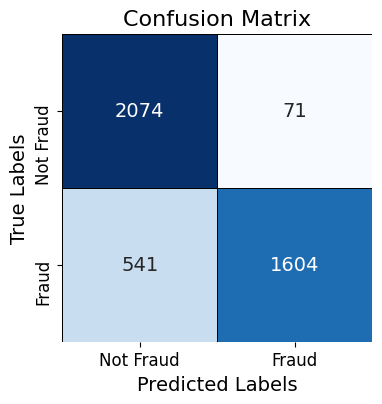

In [70]:
# SVM output
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc_svm = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of Support Vector classifier on test set: {:.3f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc_svm)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

In [71]:
print("Classification Report:\n")
print(classification_report(test_y, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2145
           1       0.96      0.75      0.84      2145

    accuracy                           0.86      4290
   macro avg       0.88      0.86      0.86      4290
weighted avg       0.88      0.86      0.86      4290



Decision Tree model

In [81]:
# Decision Tree model
dt = tree.DecisionTreeClassifier(criterion = 'gini', 
                                 max_depth = 6, 
                                 min_samples_leaf = 5,
                                 min_samples_split = 2)

# Fit the data 
dt.fit(Train_x, Train_y)

# Predict
y_pred = dt.predict(test_x)

Accuracy of random forest classifier on test set: 0.935
Confusion matrix:
[[2008  137]
 [ 141 2004]]
ROC-AUC score:
0.9351981351981352


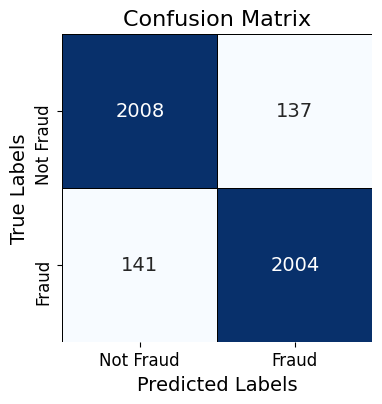

In [82]:
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc_dt = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of random forest classifier on test set: {:.3f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc_dt)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

In [74]:
print("Classification Report:\n")
print(classification_report(test_y, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2145
           1       0.98      0.82      0.89      2145

    accuracy                           0.90      4290
   macro avg       0.91      0.90      0.90      4290
weighted avg       0.91      0.90      0.90      4290



K-Nearest Neighbors model

In [83]:
# KNN model
knn = KNN(n_neighbors = 26)

# Fit the data 
knn.fit(Train_x, Train_y)

# Predict
y_pred = knn.predict(test_x)

Accuracy of random forest classifier on test set: 0.843
Confusion matrix:
[[2095   50]
 [ 625 1520]]
ROC-AUC score:
0.8426573426573427


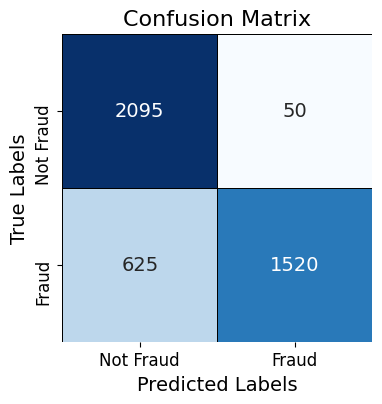

In [84]:
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc_knn = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of random forest classifier on test set: {:.3f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc_knn)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

In [85]:
print("Classification Report:\n")
print(classification_report(test_y, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      2145
           1       0.97      0.71      0.82      2145

    accuracy                           0.84      4290
   macro avg       0.87      0.84      0.84      4290
weighted avg       0.87      0.84      0.84      4290



In [90]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate = 0.2, subsample = 0.6, min_child_weight = 10, max_depth = 4, gamma = 1, colssample_bytree = 1.0)

xgb_model.fit(Train_x, Train_y)

# Predict
y_pred = xgb_model.predict(test_x)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colssample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of xgboost classifier on test set: 0.847
Confusion matrix:
[[2049   96]
 [ 559 1586]]
ROC-AUC score:
0.8473193473193473


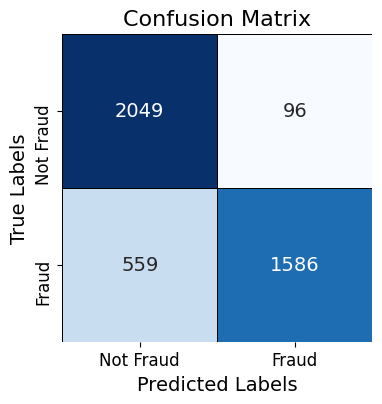

In [91]:
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc_xgb = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of xgboost classifier on test set: {:.3f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc_xgb)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

In [92]:
# List all the acurrancy 
print(auc_roc_log)
print(auc_roc_svm)
print(auc_roc_dt)
print(auc_roc_knn)
print(auc_roc_xgb)

# SAMPLE 1:1
# LOG  0.86
# SVM  0.86
# TREE 0.87
# KNN  0.75
# XGB  0.88

# SAMPLE 1:2
# LOG  0.81
# SVM  0.86
# TREE 0.86
# KNN  0.73


0.8447552447552447
0.8573426573426572
0.9351981351981352
0.8426573426573427
0.8473193473193473
